# 14.3 Zadanie: wizualizacja

In [2]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [5]:
def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))
    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1
    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)
    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))
    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)
    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)
    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')
    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):
        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)
        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)
    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)

In [7]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [8]:
metrics_dataframe = pd.DataFrame(columns = ['Description', 'F1_score TRAIN', 'F1_score TEST'])

In [9]:
c_param_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

#### Reularyzacja l1 dla wszytkich wartości listy c_param_values

Penalty-l1 F1_score with C=0.001 Train: 0.3126991351843423
Penalty-l1 F1_score with C=0.001 Test: 0.3317634746206175


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\272329034.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': [f"Penalty-l1 with C={c}"], 'F1_score TRAIN': [f1_score(y_train, predictions_lr_train)], 'F1_score TEST': [f1_score(y_test, predictions_lr_test)]})])
C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


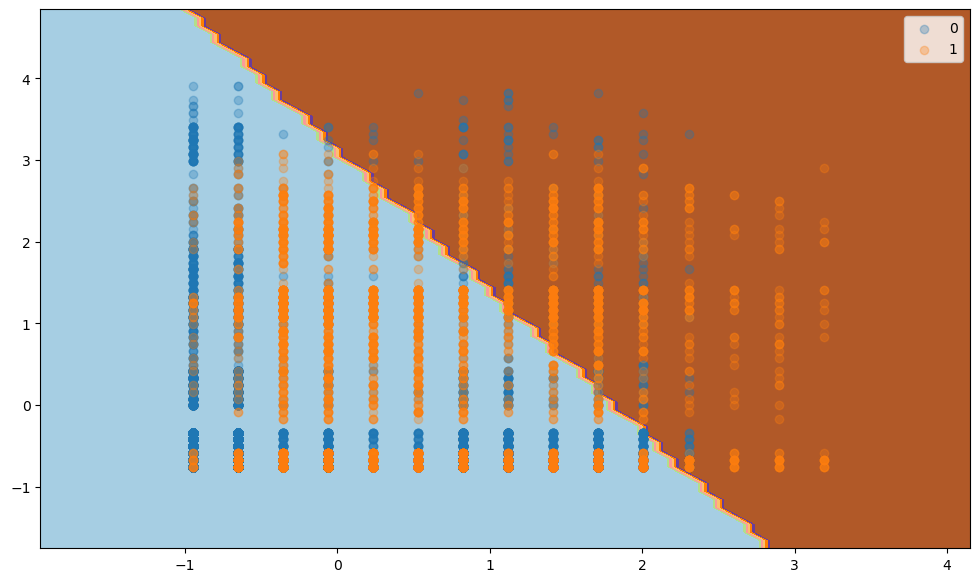

Penalty-l1 F1_score with C=0.01 Train: 0.5353233830845772
Penalty-l1 F1_score with C=0.01 Test: 0.5671752884257536


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


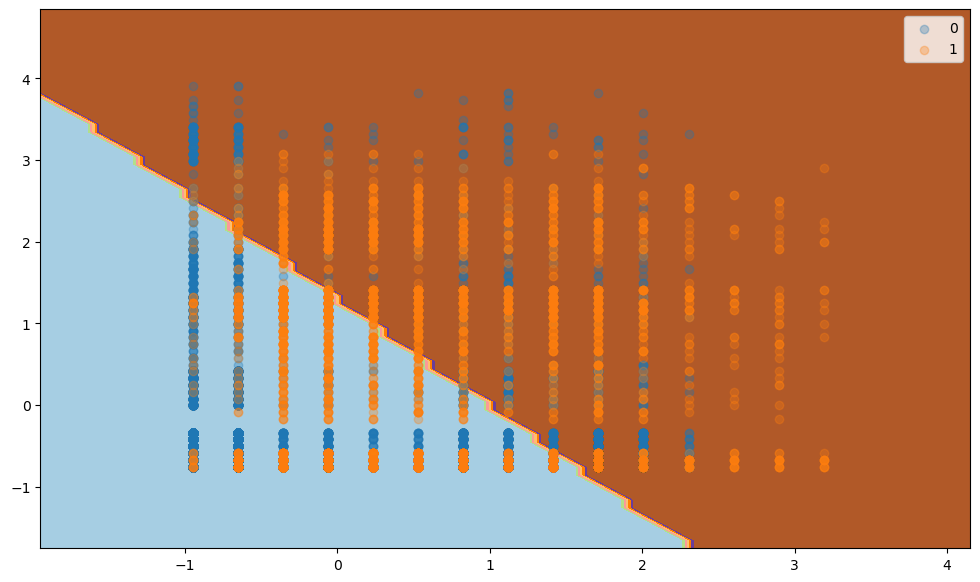

Penalty-l1 F1_score with C=0.1 Train: 0.5464035230794324
Penalty-l1 F1_score with C=0.1 Test: 0.5772893772893772


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


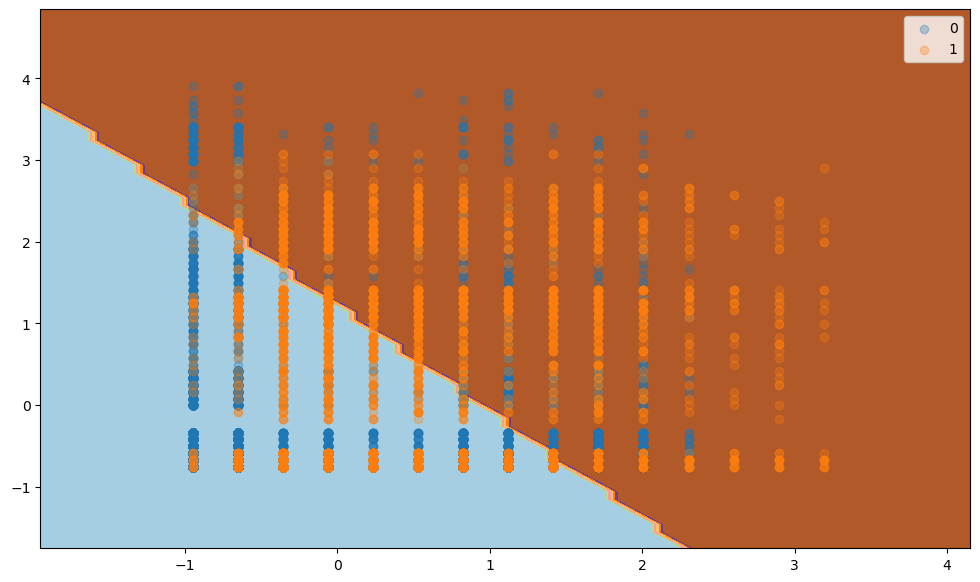

Penalty-l1 F1_score with C=1 Train: 0.5468775476928094
Penalty-l1 F1_score with C=1 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


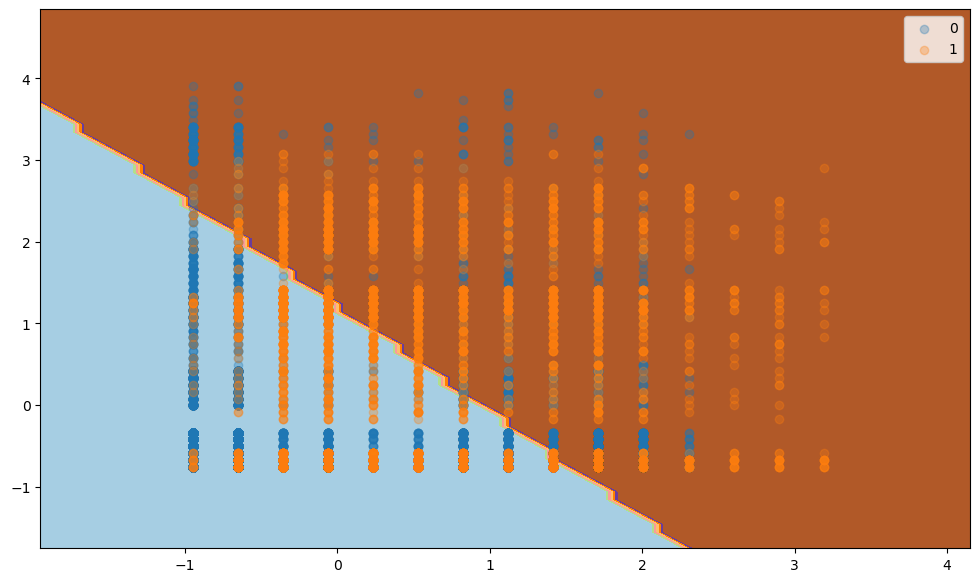

Penalty-l1 F1_score with C=10 Train: 0.5468775476928094
Penalty-l1 F1_score with C=10 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


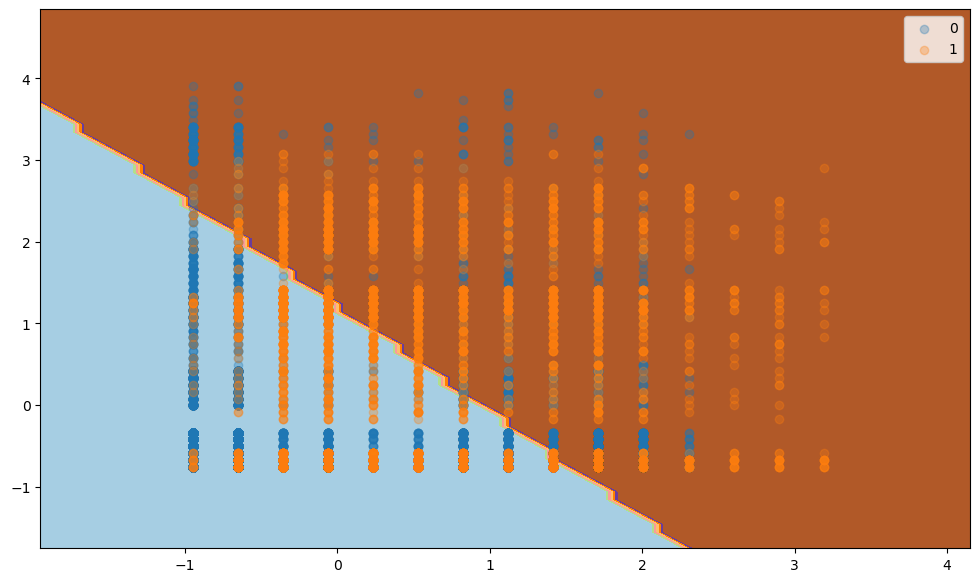

Penalty-l1 F1_score with C=100 Train: 0.5468775476928094
Penalty-l1 F1_score with C=100 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


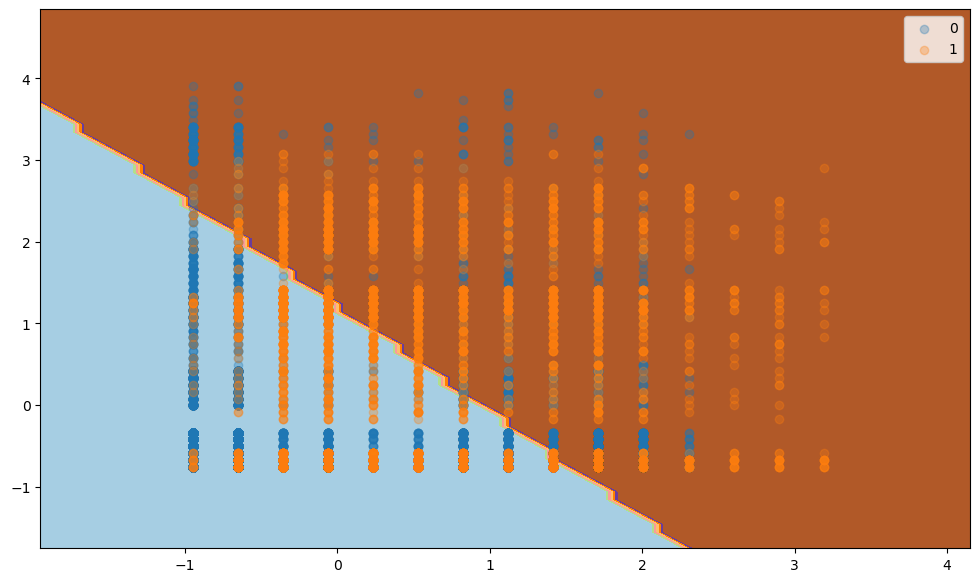

Penalty-l1 F1_score with C=1000 Train: 0.5468775476928094
Penalty-l1 F1_score with C=1000 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


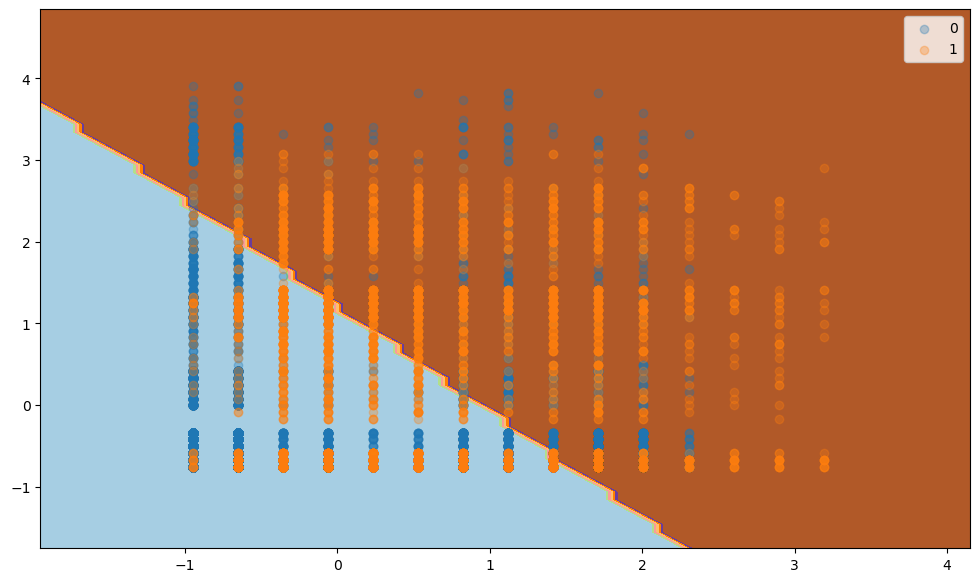

In [11]:
for c in c_param_values:
    model_lr_l1 = LogisticRegression(penalty='l1', solver='saga', C=c)
    model_lr_l1.fit(X_train_standardized, y_train)
    predictions_lr_test = model_lr_l1.predict(X_test_standardized)
    predictions_lr_train = model_lr_l1.predict(X_train_standardized)
    print(f"Penalty-l1 F1_score with C={c} Train:", f1_score(y_train, predictions_lr_train))
    print(f"Penalty-l1 F1_score with C={c} Test:", f1_score(y_test, predictions_lr_test))
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': [f"Penalty-l1 with C={c}"], 'F1_score TRAIN': [f1_score(y_train, predictions_lr_train)], 'F1_score TEST': [f1_score(y_test, predictions_lr_test)]})])
    plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l1)

#### Reularyzacja l2 dla wszytkich wartości listy c_param_values

Penalty-l2 F1_score with C=0.001 Train: 0.46925083861349237
Penalty-l2 F1_score with C=0.001 Test: 0.5060949978982766


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


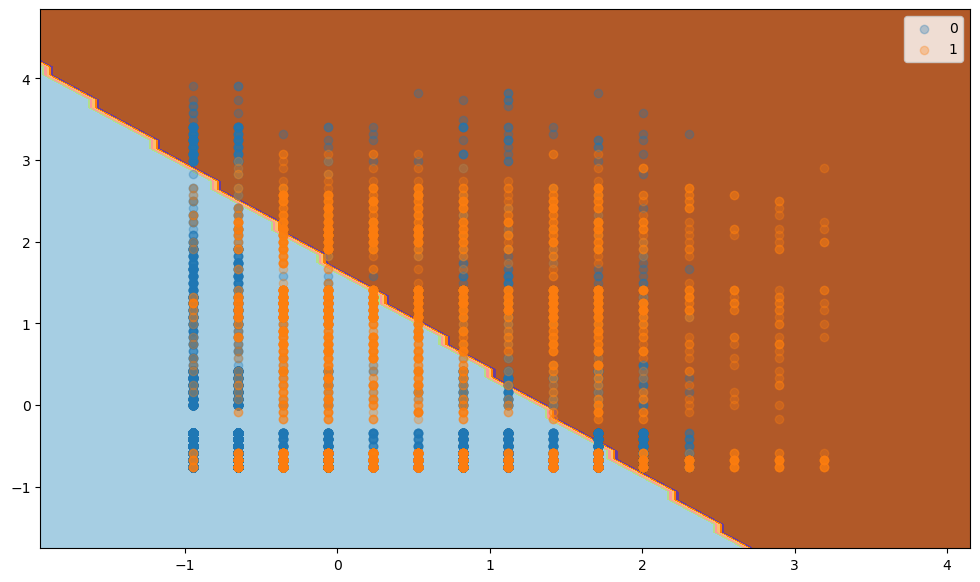

C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


Penalty-l2 F1_score with C=0.01 Train: 0.5367549668874172
Penalty-l2 F1_score with C=0.01 Test: 0.5674972108590554


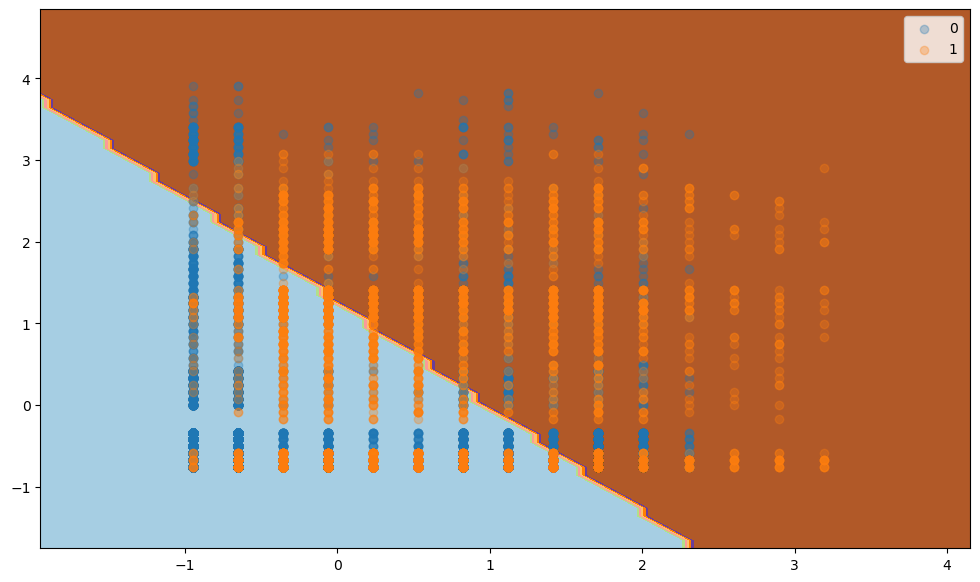

Penalty-l2 F1_score with C=0.1 Train: 0.5464035230794324
Penalty-l2 F1_score with C=0.1 Test: 0.5772893772893772


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


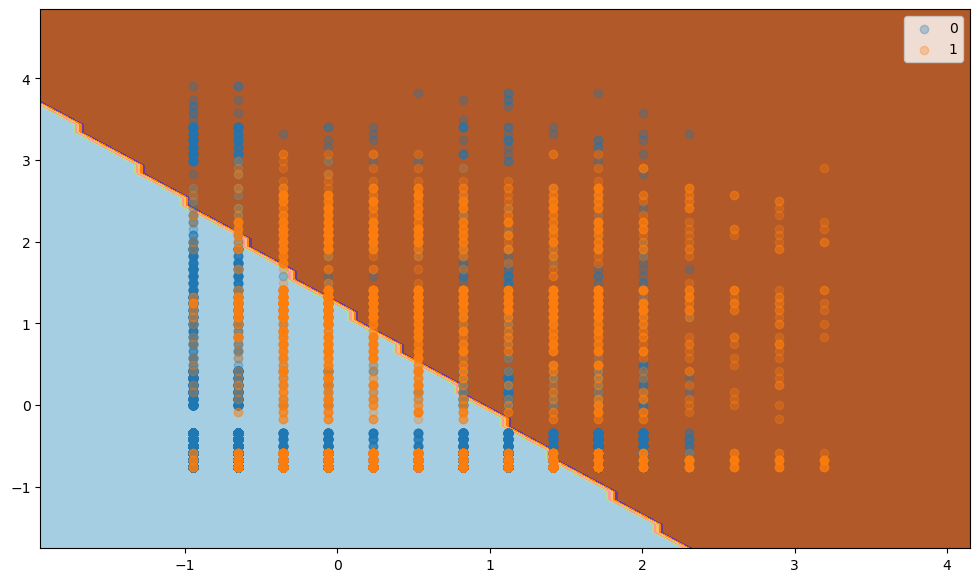

C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


Penalty-l2 F1_score with C=1 Train: 0.5468775476928094
Penalty-l2 F1_score with C=1 Test: 0.5809280233832663


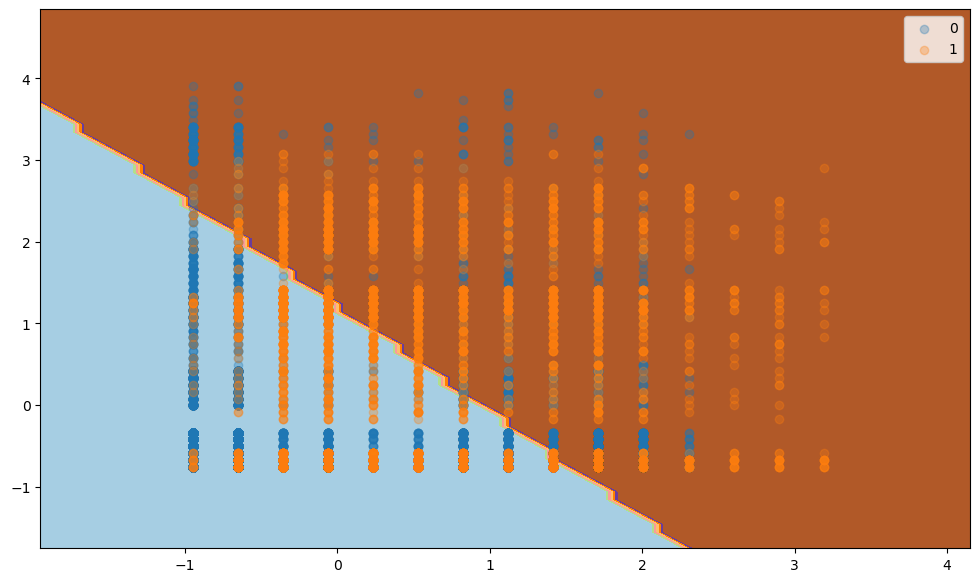

Penalty-l2 F1_score with C=10 Train: 0.5468775476928094
Penalty-l2 F1_score with C=10 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


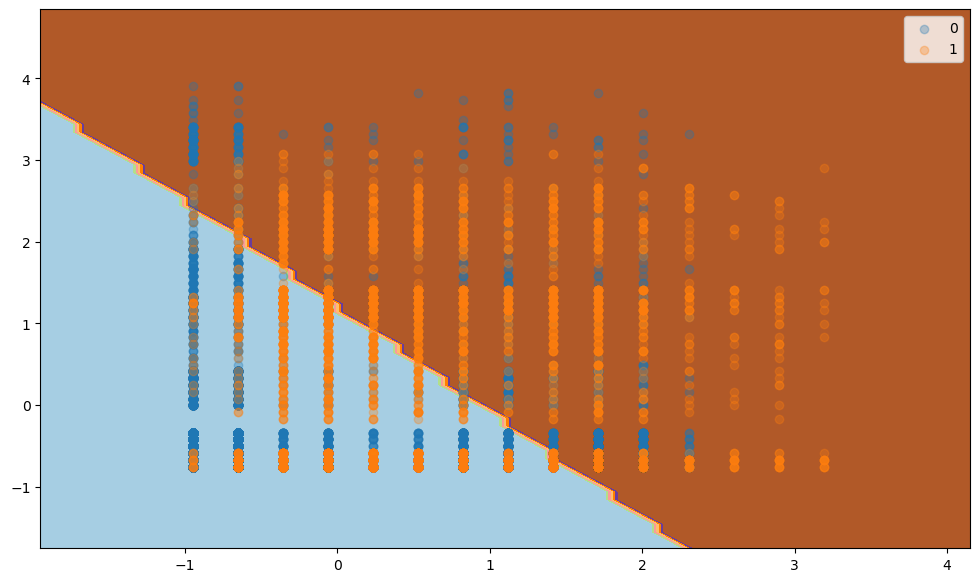

C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


Penalty-l2 F1_score with C=100 Train: 0.5468775476928094
Penalty-l2 F1_score with C=100 Test: 0.5809280233832663


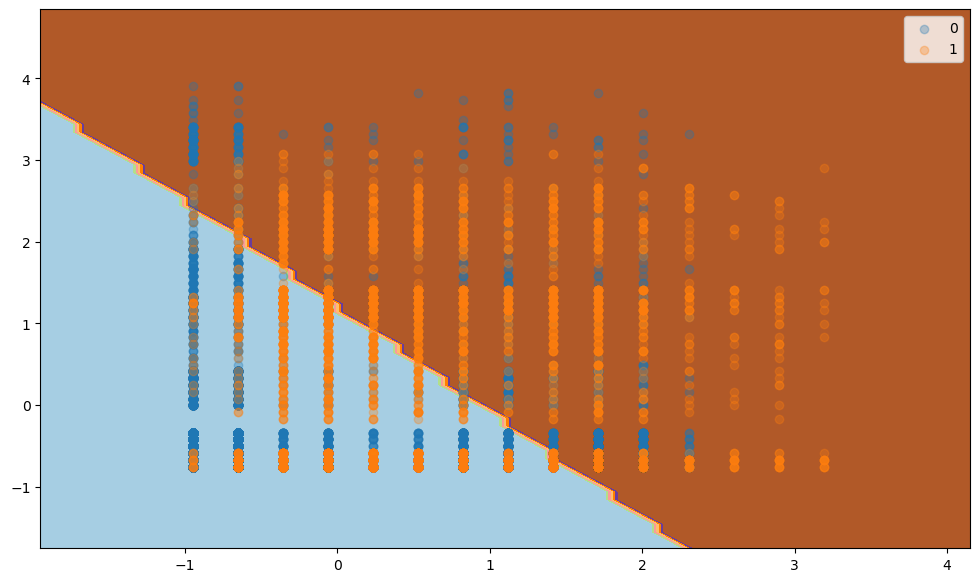

Penalty-l2 F1_score with C=1000 Train: 0.5468775476928094
Penalty-l2 F1_score with C=1000 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


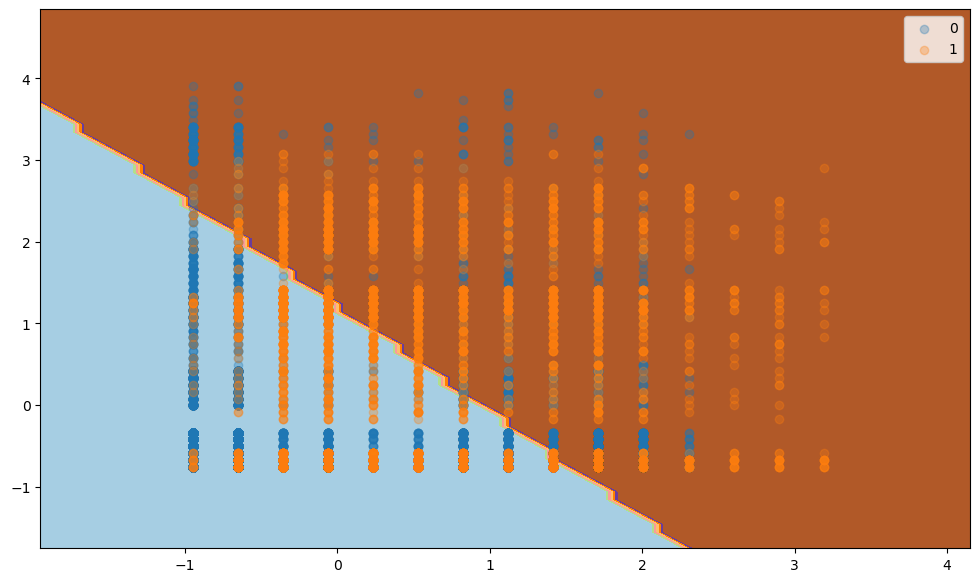

In [13]:
for c in c_param_values:
    model_lr_l2 = LogisticRegression(C=c)
    model_lr_l2.fit(X_train_standardized, y_train)
    predictions_lr_test = model_lr_l2.predict(X_test_standardized)
    predictions_lr_train = model_lr_l2.predict(X_train_standardized)
    print(f"Penalty-l2 F1_score with C={c} Train:", f1_score(y_train, predictions_lr_train))
    print(f"Penalty-l2 F1_score with C={c} Test:", f1_score(y_test, predictions_lr_test))
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': [f"Penalty-l2 with C={c}"], 'F1_score TRAIN': [f1_score(y_train, predictions_lr_train)], 'F1_score TEST': [f1_score(y_test, predictions_lr_test)]})])
    plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l2)

#### Reularyzacja elasticnet dla wszytkich wartości listy c_param_values

Penalty-elasticnet F1_score with C=0.001 Train: 0.4129423660262892
Penalty-elasticnet F1_score with C=0.001 Test: 0.44505494505494503


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


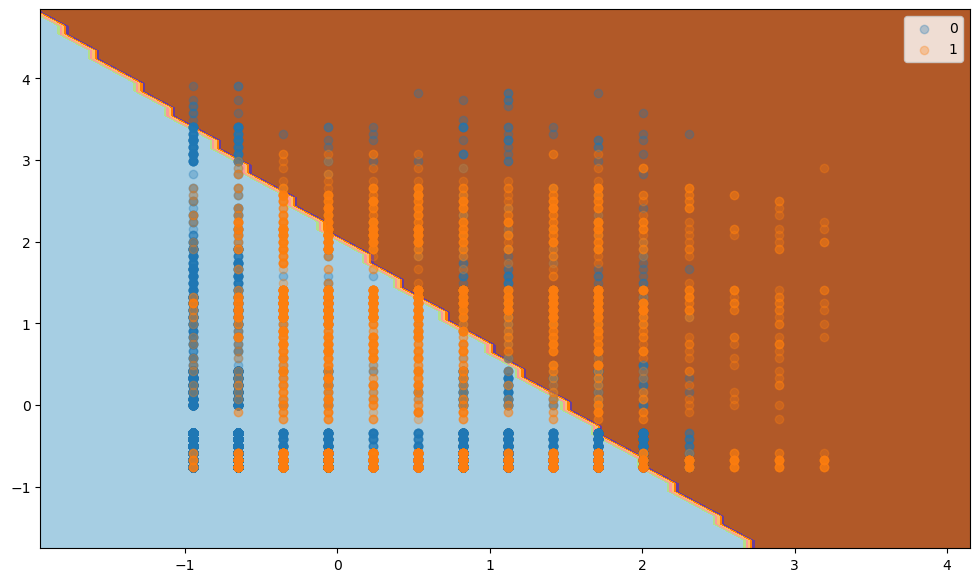

Penalty-elasticnet F1_score with C=0.01 Train: 0.536779324055666


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


Penalty-elasticnet F1_score with C=0.01 Test: 0.5671752884257536


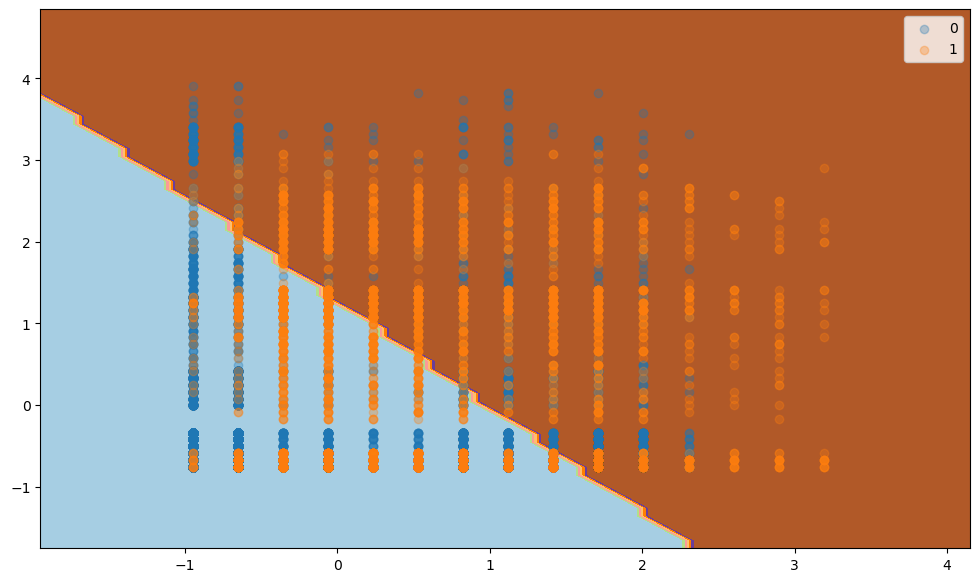

Penalty-elasticnet F1_score with C=0.1 Train: 0.5464035230794324
Penalty-elasticnet F1_score with C=0.1 Test: 0.5772893772893772


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


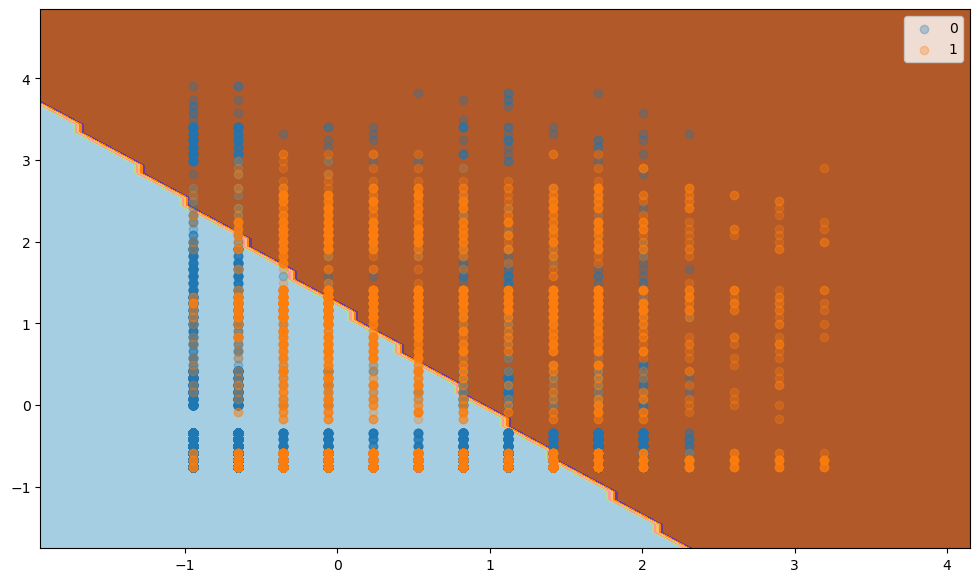

Penalty-elasticnet F1_score with C=1 Train: 0.5468775476928094
Penalty-elasticnet F1_score with C=1 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


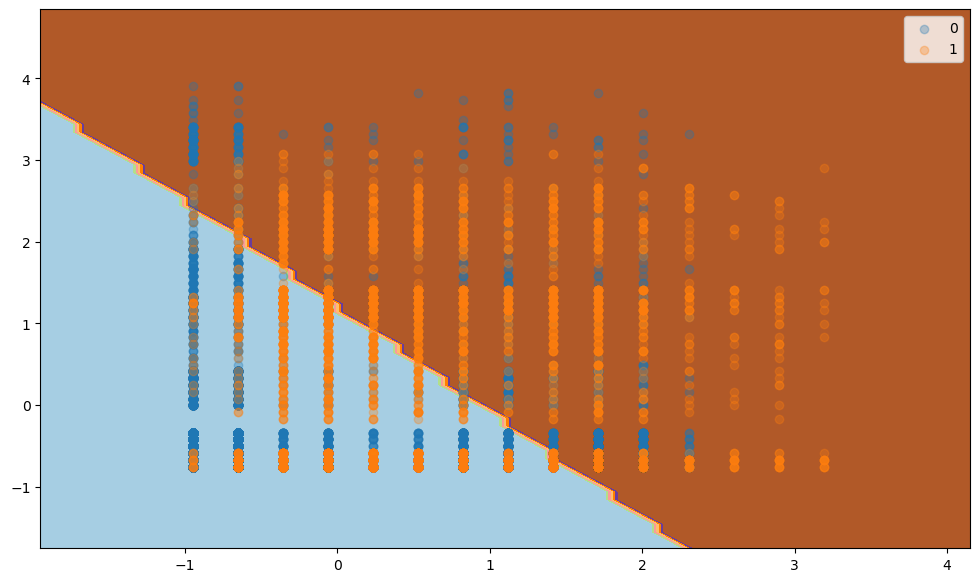

Penalty-elasticnet F1_score with C=10 Train: 0.5468775476928094
Penalty-elasticnet F1_score with C=10 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


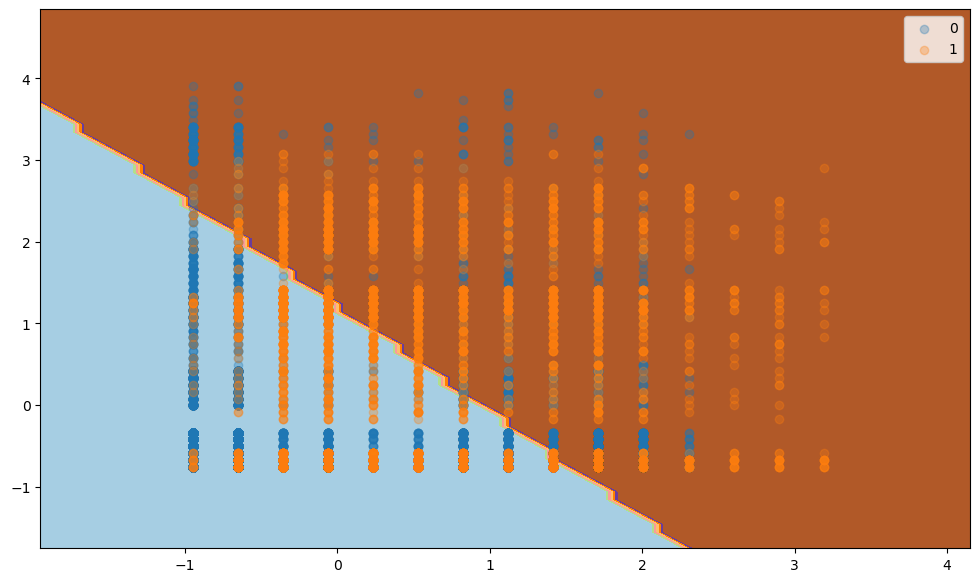

Penalty-elasticnet F1_score with C=100 Train: 0.5468775476928094
Penalty-elasticnet F1_score with C=100 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


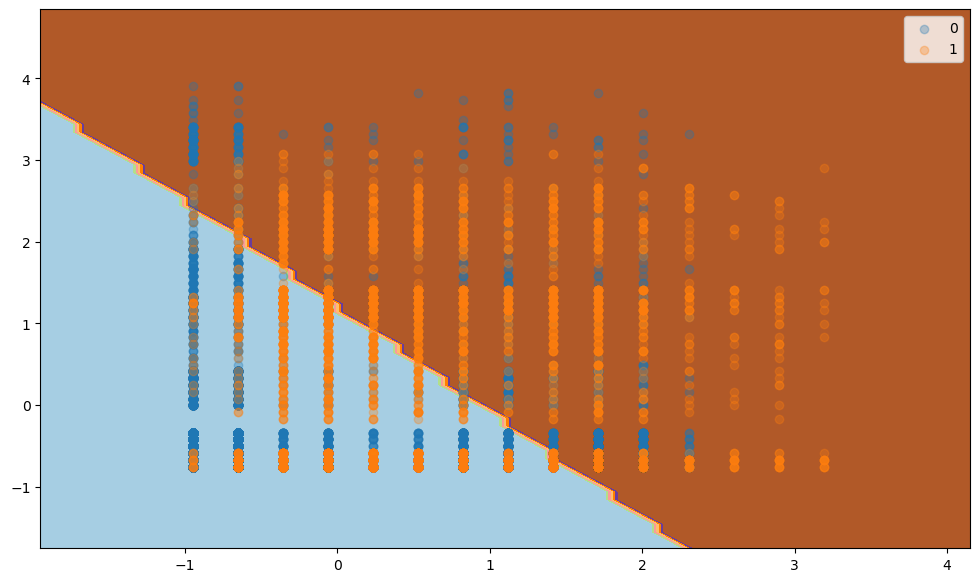

C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


Penalty-elasticnet F1_score with C=1000 Train: 0.5468775476928094
Penalty-elasticnet F1_score with C=1000 Test: 0.5809280233832663


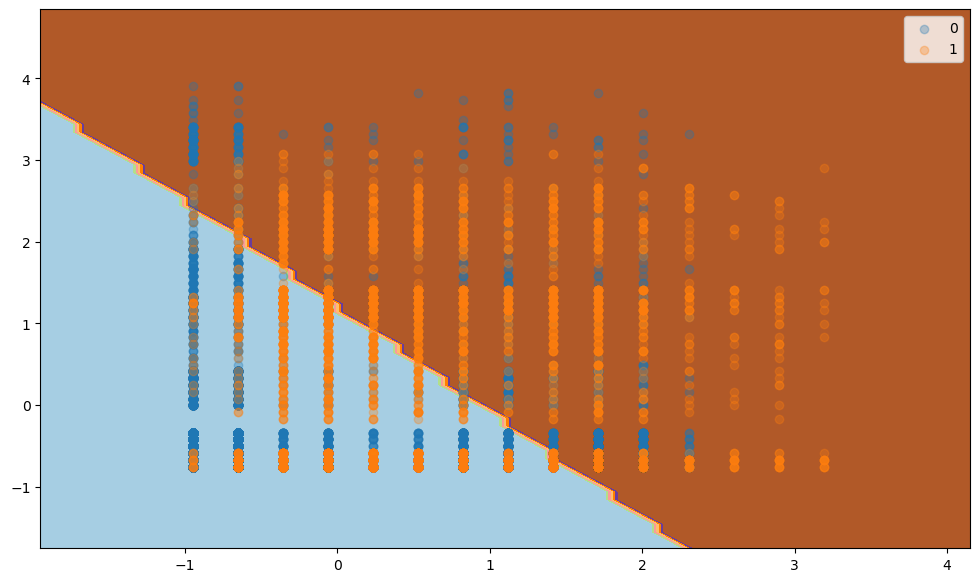

In [15]:
for c in c_param_values:
    model_lr_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', C=c, l1_ratio=0.5)
    model_lr_elasticnet.fit(X_train_standardized, y_train)
    predictions_lr_test = model_lr_elasticnet.predict(X_test_standardized)
    predictions_lr_train = model_lr_elasticnet.predict(X_train_standardized)
    print(f"Penalty-elasticnet F1_score with C={c} Train:", f1_score(y_train, predictions_lr_train))
    print(f"Penalty-elasticnet F1_score with C={c} Test:", f1_score(y_test, predictions_lr_test))
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': [f"Penalty-elasticnet with C={c}"], 'F1_score TRAIN': [f1_score(y_train, predictions_lr_train)], 'F1_score TEST': [f1_score(y_test, predictions_lr_test)]})])
    plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_elasticnet)

#### Bez regularyzacji

Penalty-none F1_score Train: 0.5468775476928094
Penalty-none F1_score Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_22428\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


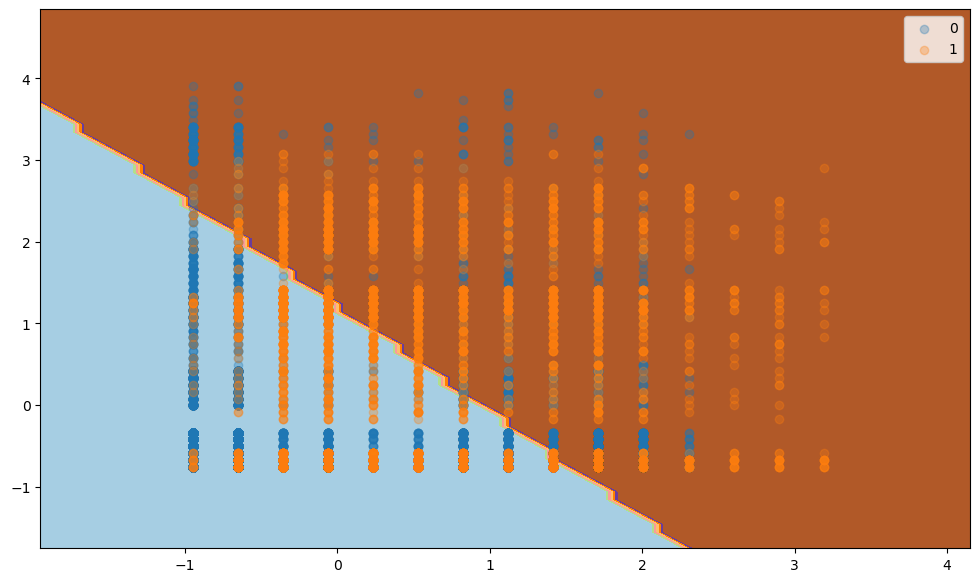

In [17]:
model_lr_none = LogisticRegression(penalty=None)
model_lr_none.fit(X_train_standardized, y_train)
predictions_lr_test = model_lr_none.predict(X_test_standardized)
predictions_lr_train = model_lr_none.predict(X_train_standardized)
print("Penalty-none F1_score Train:", f1_score(y_train, predictions_lr_train))
print("Penalty-none F1_score Test:", f1_score(y_test, predictions_lr_test))
metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame.from_dict({'Description': ["Penalty-none"], 'F1_score TRAIN': [f1_score(y_train, predictions_lr_train)], 'F1_score TEST': [f1_score(y_test, predictions_lr_test)]})])
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_none)

In [18]:
metrics_dataframe

,Description,F1_score TRAIN,F1_score TEST
0,Penalty-l1 with C=0.001,0.312699,0.331763
0,Penalty-l1 with C=0.01,0.535323,0.567175
0,Penalty-l1 with C=0.1,0.546404,0.577289
0,Penalty-l1 with C=1,0.546878,0.580928
0,Penalty-l1 with C=10,0.546878,0.580928
0,Penalty-l1 with C=100,0.546878,0.580928
0,Penalty-l1 with C=1000,0.546878,0.580928
0,Penalty-l2 with C=0.001,0.469251,0.506095
0,Penalty-l2 with C=0.01,0.536755,0.567497
0,Penalty-l2 with C=0.1,0.546404,0.577289


#### Z powyższej tabeli wynika że model Regresji Logistycznej osiąga najlepsze wyniki F1_score dla dostarczonych danych w przypadku braku regularyzacji. Potwierdzają to również wyniki osiągnięte dla regularyzacji l1, l2, i elasticnet. W przypadku C bliskiego zera F1_score daje nam niższe wyniki. Świadczy to o tym że mocna regularyzacja w tym przypadku nie poprawia nam wyniku F1_score, a w momencie gdy zwiększamy C wykładniczo i wpływ regularyzacji staje się coraz słabszy otrzymujemy wyższe wartości F1_Score. Już w przypadku C=1 wpływ regularyzacji l1, l2, elasticnet jest na tyle znikomy że daje nam takie same wyniki F1_score jak przy braku regularyzacji. 